In [1]:
import pandas as pd
import numpy as np

# Number of samples
n_samples = 500  # increased from 200 to 500

# Define the 10 general features
general_features = [
    'Energy_Level', 'Mood', 'Appetite', 'Sleep_Quality', 'Digestion',
    'Stress_Level', 'Concentration', 'Physical_Activity', 'Hydration', 'Mood_Swings'
]

# Define categories for each general feature
categories = {
    'Energy_Level': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Mood': ['Very Sad', 'Sad', 'Neutral', 'Happy', 'Very Happy'],
    'Appetite': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Sleep_Quality': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    'Digestion': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    'Stress_Level': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Concentration': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    'Physical_Activity': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Hydration': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Mood_Swings': ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
}

# Map each category to a numeric score for target calculation
score_map = {
    'Very Low': 1, 'Low': 2, 'Moderate': 3, 'High': 4, 'Very High': 5,
    'Very Sad': 1, 'Sad': 2, 'Neutral': 3, 'Happy': 4, 'Very Happy': 5,
    'Very Poor': 1, 'Poor': 2, 'Average': 3, 'Good': 4, 'Excellent': 5
}

# Create synthetic dataset with only general features
data = {}
for feature in general_features:
    data[feature] = np.random.choice(categories[feature], n_samples)

df = pd.DataFrame(data)

# Calculate overall improvement based only on these 10 general features
def calculate_overall_improvement(row):
    factors = [score_map[row[feat]] for feat in general_features]
    improvement_percent = (sum(factors) / (len(factors)*5)) * 100  # Normalize to 0-100%
    return round(improvement_percent, 1)

df['Overall_Improvement'] = df.apply(calculate_overall_improvement, axis=1)

# Save to the same Excel file
df.to_excel('General_Feedback_Synthetic.xlsx', index=False)
print(df.head(10))


  Energy_Level      Mood   Appetite Sleep_Quality  Digestion Stress_Level  \
0          Low   Neutral  Very High          Poor  Excellent     Very Low   
1          Low   Neutral  Very High          Poor  Very Poor          Low   
2     Moderate       Sad   Moderate          Poor       Good    Very High   
3    Very High       Sad        Low       Average       Good     Moderate   
4         High       Sad   Moderate          Good       Poor          Low   
5         High   Neutral        Low          Poor       Good          Low   
6     Moderate       Sad        Low       Average  Excellent    Very High   
7     Very Low  Very Sad  Very High          Poor  Excellent     Moderate   
8    Very High     Happy   Very Low     Very Poor  Very Poor     Moderate   
9    Very High   Neutral   Moderate          Poor       Poor    Very High   

  Concentration Physical_Activity Hydration Mood_Swings  Overall_Improvement  
0          Good         Very High      High        High                 7

In [2]:
df

,Energy_Level,Mood,Appetite,Sleep_Quality,Digestion,Stress_Level,Concentration,Physical_Activity,Hydration,Mood_Swings,Overall_Improvement
0,Low,Neutral,Very High,Poor,Excellent,Very Low,Good,Very High,High,High,70.0
1,Low,Neutral,Very High,Poor,Very Poor,Low,Average,Very Low,Low,Very High,52.0
2,Moderate,Sad,Moderate,Poor,Good,Very High,Good,Very High,Very Low,Low,62.0
3,Very High,Sad,Low,Average,Good,Moderate,Very Poor,High,Moderate,High,62.0
4,High,Sad,Moderate,Good,Poor,Low,Average,High,Very Low,Moderate,56.0
...,...,...,...,...,...,...,...,...,...,...,...
195,Very High,Happy,Low,Average,Good,High,Average,High,High,High,74.0
196,Moderate,Neutral,Moderate,Poor,Very Poor,Very Low,Poor,Very High,High,Moderate,54.0
197,High,Very Sad,Low,Good,Excellent,Low,Good,Moderate,High,Very Low,60.0
198,High,Very Sad,Low,Good,Good,High,Average,Very Low,Very Low,Very Low,50.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Energy_Level         200 non-null    object 
 1   Mood                 200 non-null    object 
 2   Appetite             200 non-null    object 
 3   Sleep_Quality        200 non-null    object 
 4   Digestion            200 non-null    object 
 5   Stress_Level         200 non-null    object 
 6   Concentration        200 non-null    object 
 7   Physical_Activity    200 non-null    object 
 8   Hydration            200 non-null    object 
 9   Mood_Swings          200 non-null    object 
 10  Overall_Improvement  200 non-null    float64
dtypes: float64(1), object(10)
memory usage: 17.3+ KB


In [4]:
import pandas as pandas 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
import pickle

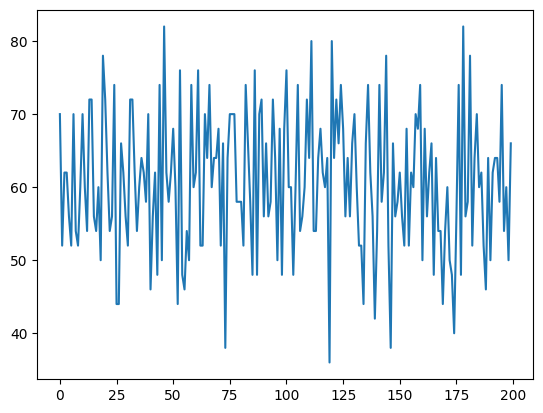

In [5]:
plt.plot(df['Overall_Improvement'])

In [6]:
features = [col for col in df.columns if df[col].dtype == 'object']
target = [col for col in df.columns if df[col].dtype == 'float64']

# Order map for only the 10 general features
order_map = {
    "Energy_Level": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Mood": ['Very Sad', 'Sad', 'Neutral', 'Happy', 'Very Happy'],
    "Appetite": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Sleep_Quality": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    "Digestion": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    "Stress_Level": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Concentration": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    "Physical_Activity": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Hydration": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Mood_Swings": ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
}

categories_list = [order_map[col] for col in features]


In [7]:
preprocessor=ColumnTransformer([('OrdinalEncoder',OrdinalEncoder(categories=categories_list),features)
])

In [8]:
X_train,X_test,y_train,y_test=train_test_split(df[features],df[target],test_size=0.2)

In [9]:
model=MultiOutputRegressor( XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
))


In [10]:
final_pipeline=Pipeline([('preprocessor',preprocessor),
                        ('XGB_model',model)])

In [11]:
final_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OrdinalEncoder',
                                                  OrdinalEncoder(categories=[['Very '
                                                                              'Low',
                                                                              'Low',
                                                                              'Moderate',
                                                                              'High',
                                                                              'Very '
                                                                              'High'],
                                                                             ['Very '
                                                                              'Sad',
                                                                              'Sad',
                                                                              'Neutral',
                                                                              'Happy',
                                                                              'Very '
                                                                              'Happy'],
                                                                             ['Very '
                                                                              'Low',
                                                                              'Low',
                                                                              'Moderate',
                                                                              'High',
                                                                              'Very '
                                                                              'High'],
                                                                             ['Very '
                                                                              'Poor',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Excellent'],
                                                                             ['Very '
                                                                              'Poor',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good...
                                                             feature_weights=None,
                                                             gamma=None,
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.05,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=4,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=na

In [12]:
y_pred=final_pipeline.predict(X_test)

In [13]:
y_pred

array([[73.214005],
       [62.22814 ],
       [60.5193  ],
       [52.234097],
       [53.720512],
       [52.768906],
       [51.900635],
       [71.89886 ],
       [56.393494],
       [56.70963 ],
       [63.42912 ],
       [61.536068],
       [68.602104],
       [70.26358 ],
       [58.998188],
       [65.97422 ],
       [60.752735],
       [50.333893],
       [63.078373],
       [67.39529 ],
       [53.023453],
       [58.23343 ],
       [72.90793 ],
       [58.31693 ],
       [56.07517 ],
       [66.410515],
       [60.267887],
       [45.587196],
       [64.136   ],
       [75.06153 ],
       [53.422867],
       [51.597824],
       [60.611347],
       [63.9041  ],
       [56.39132 ],
       [66.44137 ],
       [52.981174],
       [47.243305],
       [57.458733],
       [57.709774]], dtype=float32)

In [14]:
r2_score(y_pred,y_test)

0.7401597499847412

In [15]:
-

SyntaxError: invalid syntax (476313318.py, line 1)